# MATH 189 Final Project

by: Pranav Damal, Lucien Chen, Venz Burgos

## Objective: ...

## Thesis: ...

In [1]:
# pip install nfl_data_py
import nfl_data_py as nfl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pandas.api.types import is_numeric_dtype

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
sns.set_style("darkgrid")

## EDA

In [2]:
# Load the data
college = pd.read_csv('./data/QBCollege.csv')
nfl = pd.read_csv('./data/QBNFL.csv')

college.head(5)

,player,year,player_id,position,team_name,player_game_count,accuracy_percent,aimed_passes,attempts,avg_depth_of_target,avg_time_to_throw,bats,big_time_throws,btt_rate,completion_percent,completions,declined_penalties,def_gen_pressures,drop_rate,dropbacks,drops,first_downs,franchise_id,grades_hands_fumble,grades_offense,grades_pass,grades_run,hit_as_threw,interceptions,passing_snaps,penalties,pressure_to_sack_rate,qb_rating,sack_percent,sacks,scrambles,spikes,thrown_aways,touchdowns,turnover_worthy_plays,twp_rate,yards,ypa,draft_pos
0,Michael Penix Jr.,2023,82134,QB,WASHINGTON,15,74.5,517,556,10.7,2.68,6,43,7.3,65.5,364,1,158,5.5,577,21,226,340,68.1,91.1,90.5,67.9,2,11,614,3,7.6,106.7,2.1,12,8,0,31,36,12,2.0,4906,8.8,8.0
1,Davis Brin,2023,77642,QB,GA SOUTHRN,13,75.0,525,556,8.4,2.52,6,20,3.4,64.7,360,0,159,8.6,610,34,183,174,52.6,71.5,70.5,60.5,5,19,637,2,18.9,84.6,4.9,30,21,5,15,24,31,4.9,3786,6.8,NaN
2,Brayden Schager,2023,146078,QB,HAWAII,13,72.9,495,526,10.3,2.80,7,28,5.1,62.9,331,0,212,8.3,598,30,173,180,63.6,77.7,76.1,64.3,5,14,626,3,18.9,87.8,6.7,40,32,2,17,26,14,2.2,3525,6.7,NaN
3,Alan Bowman,2023,77679,QB,OKLA STATE,14,71.8,457,502,8.6,2.46,3,20,3.8,60.6,304,0,100,7.3,515,24,174,262,71.8,74.8,74.4,53.9,0,14,538,1,6.0,79.6,1.2,6,5,0,42,15,22,4.1,3460,6.9,NaN
4,Cameron Ward,2023,133244,QB,WASH STATE,12,78.6,444,486,7.7,2.80,10,24,4.8,66.7,324,0,173,7.2,567,25,185,341,27.9,80.6,78.0,69.7,5,7,589,1,24.9,100.7,7.6,43,36,0,27,25,21,3.6,3723,7.7,NaN


In [3]:
nfl.head(5)

,Player,Year,Plays,EPA+CPOE composite,Adj. EPA/play,EPA/play,Success rate,Cmp%,Expected cmp%,CPOE,Air yards,Total EPA
0,Patrick Mahomes,2022,881,0.182,0.309,0.304,54.60%,71.9,67.8,4.1,7.2,267.8
1,Patrick Mahomes,2018,788,0.193,0.353,0.338,52.50%,67.5,63.8,3.7,9.3,266.3
2,Matt Ryan,2016,737,0.215,0.363,0.352,55.20%,71.0,63.9,7.1,8.8,259.4
3,Aaron Rodgers,2020,700,0.212,0.361,0.354,55.30%,73.7,66.9,6.8,8.0,247.8
4,Patrick Mahomes,2019,737,0.180,0.336,0.333,52.80%,67.9,65.6,2.3,8.5,245.4


In [4]:
college.shape, nfl.shape

((4949, 44), (677, 12))

In [5]:
# Look at dtypes
college.dtypes

player                    object
year                       int64
player_id                  int64
position                  object
team_name                 object
player_game_count          int64
accuracy_percent         float64
aimed_passes               int64
attempts                   int64
avg_depth_of_target      float64
avg_time_to_throw        float64
bats                       int64
big_time_throws            int64
btt_rate                 float64
completion_percent       float64
completions                int64
declined_penalties         int64
def_gen_pressures          int64
drop_rate                float64
dropbacks                  int64
drops                      int64
first_downs                int64
franchise_id               int64
grades_hands_fumble      float64
grades_offense           float64
grades_pass              float64
grades_run               float64
hit_as_threw               int64
interceptions              int64
passing_snaps              int64
penalties 

In [6]:
nfl.dtypes

Player                 object
Year                    int64
Plays                   int64
EPA+CPOE composite    float64
Adj. EPA/play         float64
EPA/play              float64
Success rate           object
Cmp%                  float64
Expected cmp%         float64
CPOE                  float64
Air yards             float64
Total EPA             float64
dtype: object

In [7]:
# Look at a couple summary statistics
college.describe()

,year,player_id,player_game_count,accuracy_percent,aimed_passes,attempts,avg_depth_of_target,avg_time_to_throw,bats,big_time_throws,btt_rate,completion_percent,completions,declined_penalties,def_gen_pressures,drop_rate,dropbacks,drops,first_downs,franchise_id,grades_hands_fumble,grades_offense,grades_pass,grades_run,hit_as_threw,interceptions,passing_snaps,penalties,pressure_to_sack_rate,qb_rating,sack_percent,sacks,scrambles,spikes,thrown_aways,touchdowns,turnover_worthy_plays,twp_rate,yards,ypa,draft_pos
count,4949.000000,4949.000000,4949.000000,4870.000000,4949.000000,4949.000000,4870.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4373.000000,4949.000000,4949.000000,4949.000000,4949.000000,4947.000000,4949.000000,4949.000000,4313.000000,4949.000000,4949.000000,4949.000000,4949.000000,3953.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,4949.00000,4949.000000,4949.000000,4949.000000,4949.000000,4949.000000,340.000000
mean,2018.643564,69055.548192,5.049707,65.561971,95.255809,101.882198,10.568049,2.858792,1.594666,4.941806,4.189008,55.779349,61.157608,0.053748,36.224288,8.928722,116.497676,5.813094,33.096181,229.381087,57.641864,64.528107,61.424166,62.100580,0.980400,2.706405,122.498687,1.049101,19.524083,80.810305,5.457224,6.885836,7.397656,0.231764,3.81956,5.424934,4.889068,6.039887,750.323298,7.474682,111.594118
std,2.832113,42463.173966,4.198822,27.352853,133.762886,142.580408,7.667557,0.764729,2.661854,7.830914,10.971691,28.161376,88.825129,0.242804,49.689544,14.549657,160.908097,8.505005,51.863048,74.720989,17.793159,14.035542,14.992507,10.223384,1.760699,3.729658,169.205388,1.461239,20.189008,33.961965,8.071134,9.787769,11.521792,0.659666,6.11768,8.640902,6.596680,14.880476,1102.829428,7.328267,84.841897
min,2014.000000,9434.000000,1.000000,0.000000,0.000000,1.000000,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,101.000000,0.000000,16.000000,21.000000,23.700000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-16.000000,-16.000000,1.000000
25%,2016.000000,39879.000000,1.000000,59.025000,2.000000,2.000000,7.600000,2.490000,0.000000,0.000000,0.000000,48.600000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000,166.000000,46.600000,56.100000,51.700000,56.300000,0.000000,0.000000,2.000000,0.000000,2.600000,56.400000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,15.000000,4.300000,15.000000
50%,2019.000000,57455.000000,3.000000,69.200000,20.000000,21.000000,9.600000,2.750000,0.000000,1.000000,2.100000,58.200000,12.000000,0.000000,8.000000,6.900000,25.000000,1.000000,4.000000,226.000000,62.800000,65.300000,61.000000,61.700000,0.000000,1.000000,27.000000,0.000000,17.200000,82.200000,4.000000,2.000000,2.000000,0.000000,1.00000,1.000000,1.000000,2.900000,138.000000,6.800000,125.000000
75%,2021.000000,97993.000000,8.000000,77.800000,152.000000,162.000000,12.200000,3.100000,2.000000,7.000000,4.900000,66.700000,94.000000,0.000000,62.000000,10.900000,189.000000,9.000000,46.000000,300.000000,70.600000,74.200000,72.600000,68.400000,1.000000,5.000000,199.000000,2.000000,25.000000,102.100000,7.400000,11.000000,10.000000,0.000000,6.00000,7.000000,8.000000,5.300000,1133.000000,8.300000,188.250000
max,2023.000000,181169.000000,15.000000,100.000000,652.000000,692.000000,54.000000,9.900000,26.000000,54.000000,100.000000,100.000000,500.000000,2.000000,263.000000,100.000000,740.000000,44.000000,287.000000,351.000000,91.900000,95.800000,95.500000,94.500000,12.000000,23.000000,778.000000,12.000000,200.000000,158.300000,66.700000,54.000000,76.000000,7.000000,42.00000,62.000000,38.000000,100.000000,5940.000000,84.000000,262.000000


In [8]:
nfl.describe()

,Year,Plays,EPA+CPOE composite,Adj. EPA/play,EPA/play,Cmp%,Expected cmp%,CPOE,Air yards,Total EPA
count,677.000000,677.000000,677.000000,677.000000,677.000000,665.000000,665.000000,677.000000,665.000000,677.000000
mean,2019.144756,304.986706,0.062970,-0.029453,-0.061292,63.369173,65.933233,-2.517282,7.939699,21.879025
std,2.596599,282.274172,0.105231,0.386862,0.451488,12.614572,4.567258,11.629756,2.763835,59.589043
min,2015.000000,1.000000,-0.333000,-2.922000,-5.143000,0.000000,31.600000,-79.100000,-3.300000,-135.400000
25%,2017.000000,43.000000,0.009000,-0.136000,-0.155000,60.000000,63.800000,-5.500000,7.000000,-10.300000
50%,2019.000000,203.000000,0.054000,0.032000,0.011000,64.900000,66.100000,-0.700000,8.000000,1.100000
75%,2021.000000,591.000000,0.111000,0.145000,0.131000,68.600000,68.000000,2.300000,8.800000,41.300000
max,2023.000000,935.000000,0.785000,1.990000,1.990000,100.000000,87.600000,58.600000,35.000000,267.800000


In [9]:
# Some player show up multiple times, get the most recent data
college = college.groupby("player").last().reset_index()

In [10]:
# Only keep players that are in the NFL dataset
college = college[college.player.isin(nfl.Player)]

In [11]:
# Removing Brock Purdy because he is an extreme outlier in our data
college = college[college.player != "Brock Purdy"]

In [12]:
# Filter only QBs
college_qb = college[college.position == "QB"]

In [13]:
college_qb.head()

,player,year,player_id,position,team_name,player_game_count,accuracy_percent,aimed_passes,attempts,avg_depth_of_target,avg_time_to_throw,bats,big_time_throws,btt_rate,completion_percent,completions,declined_penalties,def_gen_pressures,drop_rate,dropbacks,drops,first_downs,franchise_id,grades_hands_fumble,grades_offense,grades_pass,grades_run,hit_as_threw,interceptions,passing_snaps,penalties,pressure_to_sack_rate,qb_rating,sack_percent,sacks,scrambles,spikes,thrown_aways,touchdowns,turnover_worthy_plays,twp_rate,yards,ypa,draft_pos
31,Aidan O'Connell,2019,60516,QB,PURDUE,6,75.0,156,168,8.9,2.44,3,11,6.1,61.3,103,0,45,12.0,175,14,57,273,63.0,77.3,77.3,60.3,0,4,188,2,6.7,86.4,1.7,3,4,2,7,8,7,3.7,1101,6.6,135.0
87,Anthony Brown,2017,40316,QB,BOSTON COL,10,63.6,242,260,9.5,2.66,7,6,2.2,51.9,135,0,106,12.3,291,19,76,121,52.4,56.9,50.6,69.6,3,9,301,0,8.5,66.9,3.1,9,22,1,7,11,15,5.0,1366,5.3,NaN
96,Anthony Richardson,2020,124393,QB,FLORIDA,2,50.0,2,2,21.5,3.53,0,0,0.0,50.0,1,0,1,0.0,3,0,2,163,20.3,65.5,63.2,63.4,0,1,3,0,0.0,95.8,0.0,0,1,0,0,1,0,0.0,27,13.5,4.0
154,Bailey Zappe,2021,60396,QB,W KENTUCKY,14,77.3,649,691,8.6,2.47,11,48,6.5,68.7,475,0,94,5.4,730,27,287,346,73.2,87.8,87.4,53.3,3,11,774,7,16.0,118.5,2.1,15,24,1,27,62,24,3.1,5940,8.6,137.0
155,Baker Mayfield,2015,46518,QB,OKLAHOMA,13,77.2,381,396,9.0,2.91,3,25,6.0,67.7,268,0,163,8.8,484,26,194,261,61.1,91.7,91.5,68.2,0,7,504,1,24.5,120.3,8.3,40,48,1,11,36,11,2.2,3699,9.3,1.0


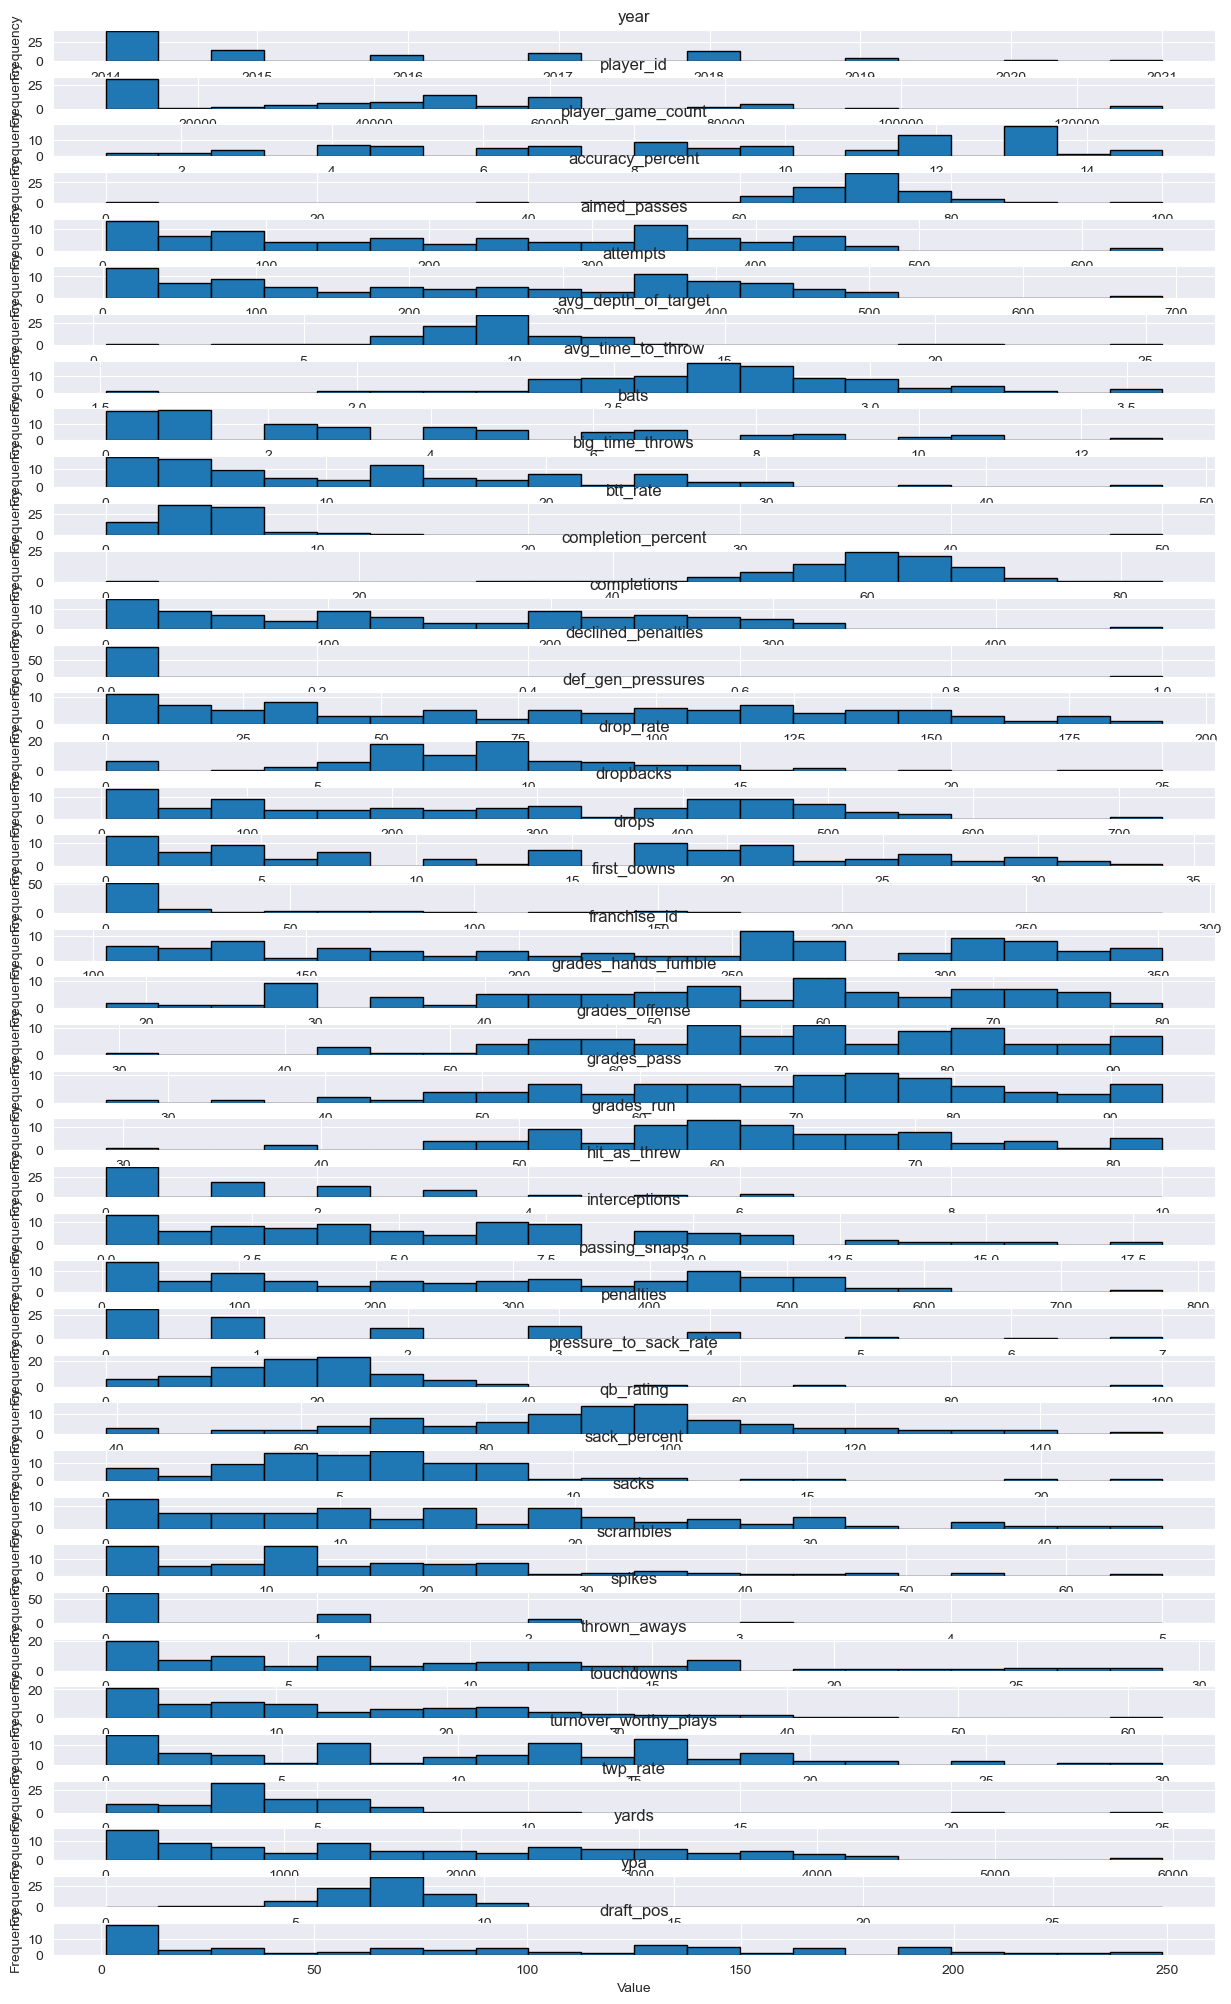

In [14]:
# Plot the distribution of our numerical columns
numerical_cols = college_qb.columns[[is_numeric_dtype(col) for col in college_qb.dtypes]]

fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=1, figsize=(15, 25))

for i, column in enumerate(numerical_cols):
    ax = axes[i]
    ax.hist(college_qb[column].dropna(), bins=20, edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

In [15]:
from pandas.api.types import is_numeric_dtype

<Axes: >

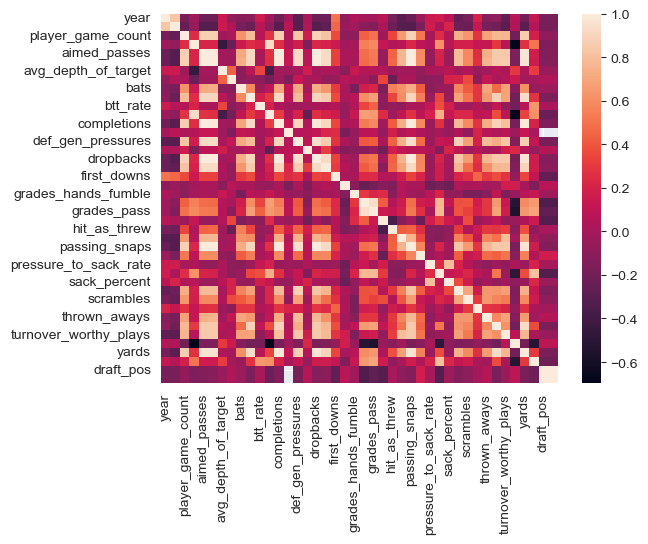

In [16]:
# Create a correlation heatmap between columns in the college dataset and draft position and total epa from the nfl dataset
combined = pd.merge(college, nfl, left_on="player", right_on="Player")
numerical_cols = college.columns[college.dtypes.apply(is_numeric_dtype)].to_list() + ["draft_pos"]
sns.heatmap(combined[numerical_cols].corr())

<Axes: xlabel='draft_pos', ylabel='Total EPA'>

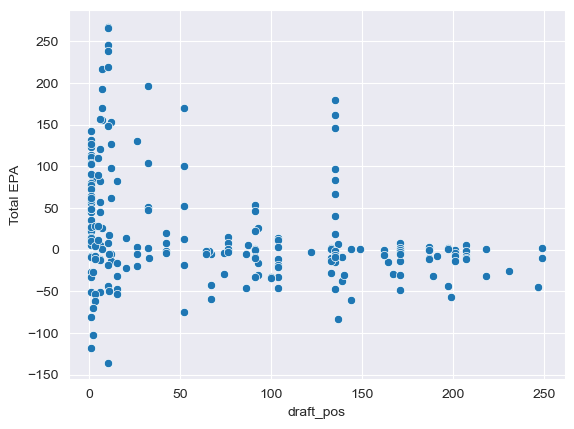

In [17]:
# Plot relationship between draft position and Total EPA
sns.scatterplot(x=combined.draft_pos, y=combined["Total EPA"])

In [18]:
# Create a Lasso regression for parameter selection, test case
from sklearn.linear_model import Lasso, Ridge
from sklearn.impute import SimpleImputer

# Split the data into training and test sets
cols = college.columns[college.dtypes.apply(is_numeric_dtype)]
X = combined[cols]
y = combined["Total EPA"]

mean_imputer = SimpleImputer(strategy='mean')

X = mean_imputer.fit_transform(X)
# Create a Ridge regression object
lasso = Lasso(alpha=1.0)

# Fit the model to the training data
lasso.fit(X, y)

Lasso()

In [19]:
# Create a dataframe containing our coefficients
lasso_coefs = pd.DataFrame(index=cols, data=lasso.coef_, columns=["coef"])
lasso_coefs[lasso_coefs.coef != 0]

,coef
player_id,-0.000432
player_game_count,-1.915955
accuracy_percent,0.778321
aimed_passes,-0.391133
attempts,-0.009326
avg_depth_of_target,0.236871
bats,0.177291
big_time_throws,-1.993364
btt_rate,0.528579
completions,-1.177779


In [20]:
# Manually subset columns we think are important
cols = [
    'player_game_count', 'avg_time_to_throw', 'big_time_throws', 'completions', 'def_gen_pressures', 'dropbacks', 'first_downs', 'grades_offense',
    'interceptions', 'pressure_to_sack_rate', 'sacks', 'scrambles', 'thrown_aways', 'touchdowns', 'turnover_worthy_plays', 'twp_rate', 'ypa', 'draft_pos'
]

In [21]:
# Create a function to repeat the parameter selection process above
def get_significant_features(df, cols, response):
    X = df[cols]
    y = df[response]
    
    mean_imputer = SimpleImputer(strategy='mean')
    
    X = mean_imputer.fit_transform(X)
    # Create a Lasso regression object
    lasso = Lasso(alpha=1.0)

    # Fit the model to the training data
    lasso.fit(X, y)

    # Create a dataframes with the coefficients
    lasso_coefs = pd.DataFrame(index=cols, data=lasso.coef_, columns=["coef"])

    # Gets the significant features, that is the ones that have not been penalized by regularization
    sig_coefs = set(lasso_coefs[lasso_coefs.coef != 0].index)

    return sig_coefs, lasso_coefs

In [22]:
# Run parameter selection with our subset of columns
sig_coefs, coef_df = get_significant_features(combined, cols, "Total EPA")
coef_df

,coef
player_game_count,-3.461772
avg_time_to_throw,0.000000
big_time_throws,-1.868011
completions,-1.431214
def_gen_pressures,0.303929
dropbacks,0.878534
first_downs,-0.118538
grades_offense,-0.093279
interceptions,0.000000
pressure_to_sack_rate,-1.067524


In [23]:
# Create a new dataframe with a new composite score
composite_df = combined.copy()
composite_df["composite"] = 0.6 * combined.Plays + 0.4 * combined["Total EPA"]

In [24]:
# Repeat procedure above with the new composite score
sig_comp_coefs, comp_coef_df = get_significant_features(composite_df, cols, "composite")
comp_coef_df

,coef
player_game_count,-8.804519
avg_time_to_throw,1.572308
big_time_throws,-2.810681
completions,-4.336844
def_gen_pressures,0.742635
dropbacks,2.780368
first_downs,0.187704
grades_offense,-1.052861
interceptions,-0.188881
pressure_to_sack_rate,-1.590687


In [25]:
# Train a base model to see how well it performs
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = composite_df[["draft_pos"]]
y = composite_df["composite"]

X = mean_imputer.fit_transform(X)

lm = LinearRegression().fit(X, y)

preds = lm.predict(X)

rmse = mean_squared_error(y, preds) ** 0.5

rmse

156.21032754915785

In [26]:
# Test our base model against a more complex model
X = composite_df[list(sig_comp_coefs)]

X = mean_imputer.fit_transform(X)

lm = LinearRegression().fit(X, y)

preds = lm.predict(X)

rmse = mean_squared_error(y, preds) ** 0.5

rmse

141.50587875534052

In [27]:
# Calculate career stats for each player in our dataset
data = pd.read_csv('./data/QBCollege.csv')
players = data.player.unique()

career_cols = ["player"] + sorted(list(sig_comp_coefs))
career_avg = pd.DataFrame(columns=career_cols)

idx = 0

for player in players:
    d = data[data.player == player].fillna(0)
    avg_time_to_throw = (d.avg_time_to_throw * d.dropbacks).sum() / d.dropbacks.sum()
    big_time_throws = d.big_time_throws.sum()
    completions = d.completions.sum()
    def_gen_pressures = d.def_gen_pressures.sum()
    draft_pos = d.draft_pos.max()
    dropbacks = d.dropbacks.sum()
    first_downs = d.first_downs.sum()
    grades_offense = (d.grades_offense * d.dropbacks).sum() / d.dropbacks.sum()
    interceptions = d.interceptions.sum()
    player_game_count = d.player_game_count.sum()
    pressure_to_sack_rate = d.sacks.sum() / d.def_gen_pressures.sum()
    sacks = d.sacks.sum()
    scrambles = d.scrambles.sum()
    thrown_aways = d.thrown_aways.sum()
    touchdowns = d.touchdowns.sum()
    turnover_worthy_plays = d.turnover_worthy_plays.sum()
    twp_rate = d.turnover_worthy_plays.sum() / d.dropbacks.sum()
    ypa = (d.ypa * d.attempts).sum() / d.attempts.sum()
    datum = [
        player,
        avg_time_to_throw,
        big_time_throws,
        completions,
        def_gen_pressures,
        draft_pos,
        dropbacks,
        first_downs,
        grades_offense,
        interceptions,
        player_game_count,
        pressure_to_sack_rate,
        sacks,
        scrambles,
        thrown_aways,
        touchdowns,
        turnover_worthy_plays,
        twp_rate,
        ypa
    ]
    values = zip(career_cols, datum)
    career_avg.loc[idx] = dict(values)
    idx += 1

In [28]:
# Filter out players that were not drafted
career_avg = career_avg[career_avg.draft_pos != 0]

In [29]:
# Predict epa based on career averages
X = career_avg[list(sig_comp_coefs)]
X_test = mean_imputer.fit_transform(X)
preds = lm.predict(X_test)
career_avg["predicted_epa"]= preds

In [30]:
# Compute a "ground-truth" trendline from the true total epa and draft position
drafted = composite_df.fillna(0)[composite_df.draft_pos != 0]
trendline = LinearRegression().fit(drafted[["draft_pos"]], drafted["composite"]).predict(np.linspace(1, 300, 300).reshape(-1, 1))

<Axes: xlabel='draft_pos', ylabel='predicted_epa'>

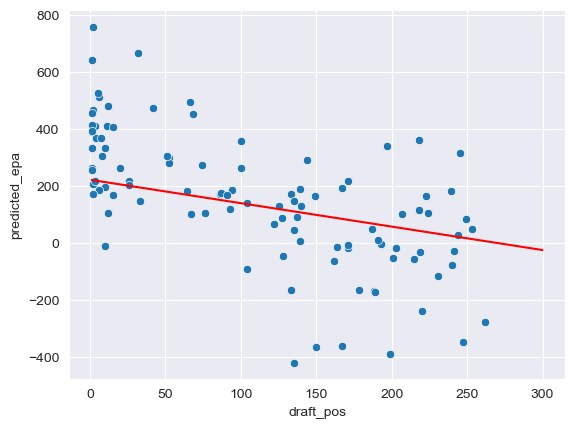

In [31]:
# Plot our trendline against our data
sns.scatterplot(x="draft_pos", y="predicted_epa", data=career_avg)
sns.lineplot(x=np.linspace(1, 300, 300), y=trendline, color="red")